In [1]:
import csv
import numpy as np
# Nombre del archivo CSV
archivo_csv = "Oscilador Torcional.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "﻿Rad": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Columna "VoltajeV)": [3.6, 8.0, 12.8, 15.6, 20.0, 23.4, 28.2, 31.6, 36.4, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Columna "Rad2": [0.0, -0.21, -0.4, -0.51, -0.7, -0.81, -0.91, 0.2, 0.4, 0.58, 0.72, 0.84, 0.94, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Columna "Peso(g)": [0.0, -100.0, -200.0, -300.0, -400.0, -500.0, -600.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Columna "e(Rad)": [0.01, 0.01, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

In [11]:
A = columnas["﻿Rad"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["VoltajeV)"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

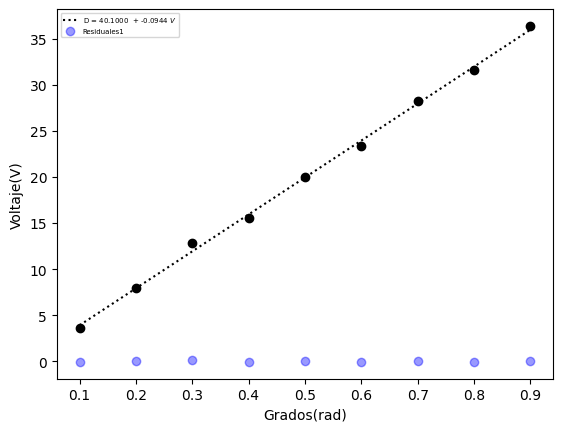

La incertidumbre en el pendiente es de 0.628
La incertidumbre en el intercepto es de 0.3534


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [(y1 - ((slope1 * x) + intercept1))/len(X) for x, y1 in zip(X, Y)]
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('Grados(rad)')
plt.ylabel("Voltaje(V)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("RadvsV.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

[-0.0008284023668639055, -0.004171597633136094, -0.005976331360946744, -0.001627218934911241, -0.0034319526627218846, 0.0009171597633136097, 0.006035502958579882, 0.0017455621301775137, 0.004319526627218935, 0.0053550295857988095, 0.0033136094674556162, -0.0002662721893491166, -0.00538461538461539]


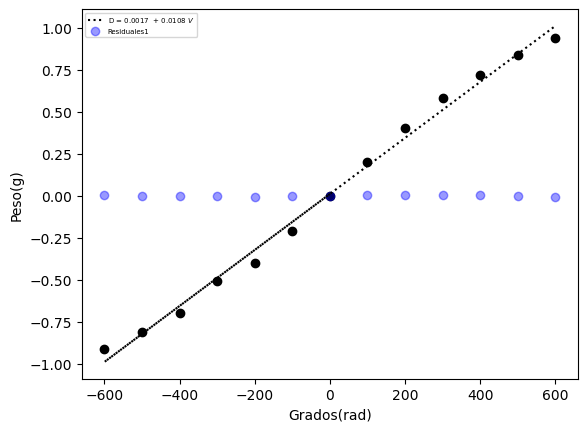

La incertidumbre en el pendiente es de 0.0
La incertidumbre en el intercepto es de 0.0152


In [13]:
A = columnas["Peso(g)"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["Rad2"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [(y1 - ((slope1 * x) + intercept1))/len(X) for x, y1 in zip(X, Y)]
print(residuales1)
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('Grados(rad)')
plt.ylabel("Peso(g)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("RadvsPeso.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

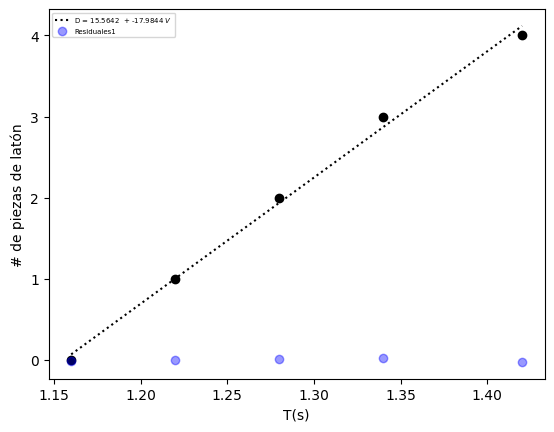

La incertidumbre en el pendiente es de 0.5616
La incertidumbre en el intercepto es de 0.7229


In [14]:
A = columnas["T"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["N de piezas"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [(y1 - ((slope1 * x) + intercept1))/len(X) for x, y1 in zip(X, Y)]
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('T(s)')
plt.ylabel("# de piezas de latón")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("TvsN.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

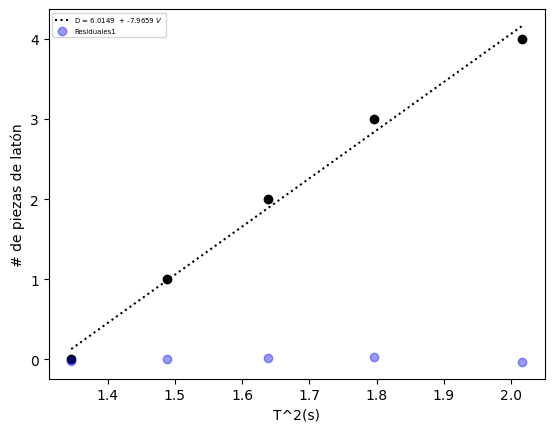

La incertidumbre en el pendiente es de 0.317
La incertidumbre en el intercepto es de 0.5305


In [15]:
A = columnas["T"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i]**2)

B=columnas["N de piezas"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [(y1 - ((slope1 * x) + intercept1))/len(X) for x, y1 in zip(X, Y)]
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('T^2(s)')
plt.ylabel("# de piezas de latón")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("T2vsN.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

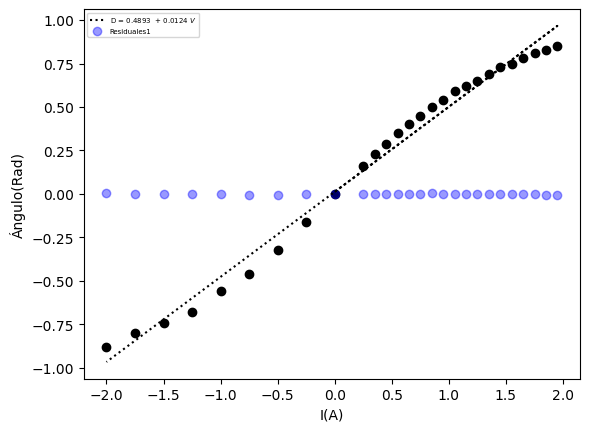

La incertidumbre en el pendiente es de 0.0111
La incertidumbre en el intercepto es de 0.0134


In [16]:
A = columnas["I(A)"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["Delta Rad"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [(y1 - ((slope1 * x) + intercept1))/len(X) for x, y1 in zip(X, Y)]
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('I(A)')
plt.ylabel("Ángulo(Rad)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("IvsRad.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")